## Analyzing human and LLM common sense and statement features


In [1]:
# Change to home directory
import os

os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

import matplotlib

# Set default font to Arial
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.sans-serif"] = "Arial"

## Load human data


In [3]:
# Human ratings
# Do you agree with this statement?
individual = pd.read_csv("data/results/individual_ratings.csv", index_col=0)

# Do you think most people would agree with this statement?
group = pd.read_csv("data/results/group_ratings.csv", index_col=0)

# Majority voting (skip participants who didn't answer)
avg_vote_per_q = individual.mean(axis=1, skipna=True)
maj_i = (avg_vote_per_q >= 0.5).astype(int)

# Majority of "others agree" answers by humans
maj_others = (group.mean(1, skipna=True) >= 0.5).astype(int)

## Load LLM data


In [4]:
from src.utilities import load_annotations_gpt
from src.utilities import load_results_hf
from src.utilities import load_results_freq
from src.utilities import load_results_gpt5

all_models = {}

all_models["GPT-3.5"] = load_annotations_gpt(
    model_name="gpt-3.5-turbo-0125", trial_no=1, verbose=True
)
all_models["GPT-4-0125"] = load_annotations_gpt(
    model_name="gpt-4-0125-preview", trial_no=1, verbose=True
)
all_models["GPT-4-0409"] = load_annotations_gpt(
    model_name="gpt-4-turbo-2024-04-09", trial_no=1, verbose=True
)
all_models["GPT-4o"] = load_annotations_gpt(
    model_name="gpt-4o-2024-05-13", trial_no=1, verbose=True
)
all_models["GPT-5"] = load_results_gpt5(model_name="gpt-5-2025-08-07", verbose=True)

all_models["LLaMA-2-7B"] = load_results_hf(
    model_name="meta-llama--Llama-2-7b-chat-hf", verbose=True
)
all_models["LLaMA-2-13B"] = load_results_hf(
    model_name="meta-llama--Llama-2-13b-chat-hf", verbose=True
)
all_models["LLaMA-2-70B"] = load_results_hf(
    model_name="meta-llama--Llama-2-70b-chat-hf", verbose=True
)

all_models["LLaMA-3-8B"] = load_results_hf(
    model_name="meta-llama--Meta-Llama-3-8B-Instruct", verbose=True
)
all_models["LLaMA-3-70B"] = load_results_hf(
    model_name="meta-llama--Meta-Llama-3-70B-Instruct", verbose=True
)

all_models["Flan-T5-Small"] = load_results_hf(
    model_name="google--flan-t5-small", verbose=True
)
all_models["Flan-T5-Base"] = load_results_hf(
    model_name="google--flan-t5-base", verbose=True
)
all_models["Flan-T5-Large"] = load_results_hf(
    model_name="google--flan-t5-large", verbose=True
)
all_models["Flan-T5-XL"] = load_results_hf(
    model_name="google--flan-t5-xl", verbose=True
)
all_models["Flan-T5-XXL"] = load_results_hf(
    model_name="google--flan-t5-xxl", verbose=True
)
# all_models["Flan-UL2"] = load_results_hf(model_name="google--flan-ul2", verbose=True)

all_models["Gemma-2B"] = load_results_hf(model_name="google--gemma-2b-it", verbose=True)
all_models["Gemma-7B"] = load_results_hf(model_name="google--gemma-7b-it", verbose=True)

all_models["Gemini Pro 1.0"] = load_results_freq(model_name="gemini-pro", verbose=True)

all_models["Mistral-7B"] = load_results_hf(
    model_name="mistralai--Mistral-7B-Instruct-v0.2", verbose=True
)
all_models["Mixtral-8x7B"] = load_results_hf(
    model_name="mistralai--Mixtral-8x7B-Instruct-v0.1", verbose=True
)
all_models["Mixtral-8x22B"] = load_results_hf(
    model_name="mistralai--Mixtral-8x22B-Instruct-v0.1", verbose=True
)

all_models["Mistral-Large"] = load_results_freq(
    model_name="mistral-large-latest", verbose=True
)

all_models["OLMo-7B"] = load_results_hf(
    model_name="allenai--OLMo-7B-Instruct", verbose=True
)

all_models["Falcon-7B"] = load_results_hf(
    model_name="tiiuae--falcon-7b-instruct", verbose=True
)
all_models["Falcon-40B"] = load_results_hf(
    model_name="tiiuae--falcon-40b-instruct", verbose=True
)
all_models["Falcon-180B"] = load_results_hf(
    model_name="tiiuae--falcon-180B-chat", verbose=True
)

all_models["Claude 3 Opus"] = load_results_freq(
    model_name="claude-3-opus", verbose=True
)
all_models["Claude 3 Sonnet"] = load_results_freq(
    model_name="claude-3-sonnet", verbose=True
)
all_models["Claude 3 Haiku"] = load_results_freq(
    model_name="claude-3-haiku", verbose=True
)

all_models["DBRX"] = load_results_hf(
    model_name="databricks--dbrx-instruct", verbose=True
)

all_models["Qwen2-0.5B"] = load_results_hf(
    model_name="Qwen--Qwen2-0.5B-Instruct", verbose=True
)
all_models["Qwen2-1.5B"] = load_results_hf(
    model_name="Qwen--Qwen2-1.5B-Instruct", verbose=True
)
all_models["Qwen2-7B"] = load_results_hf(
    model_name="Qwen--Qwen2-7B-Instruct", verbose=True
)
all_models["Qwen2-57B"] = load_results_hf(
    model_name="Qwen--Qwen2-57B-A14B-Instruct", verbose=True
)
all_models["Qwen2-72B"] = load_results_hf(
    model_name="Qwen--Qwen2-72B-Instruct", verbose=True
)

Statement: 0it [00:00, ?it/s]

Question q1 has 50 repetitions


Question q2 has 50 repetitions


Question q3 has 50 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


Question q1 has 23 repetitions


Question q2 has 23 repetitions


Question q3 has 23 repetitions


In [5]:
model_to_color = {
    "GPT-3.5": "forestgreen",
    "GPT-4-0125": "forestgreen",
    "GPT-4-0409": "forestgreen",
    "GPT-4o": "forestgreen",
    "GPT-5": "forestgreen",
    "LLaMA-2-7B": "indianred",
    "LLaMA-2-13B": "indianred",
    "LLaMA-2-70B": "indianred",
    "LLaMA-3-8B": "indianred",
    "LLaMA-3-70B": "indianred",
    "Flan-T5-Small": "royalblue",
    "Flan-T5-Base": "royalblue",
    "Flan-T5-Large": "royalblue",
    "Flan-T5-XL": "royalblue",
    "Flan-T5-XXL": "royalblue",
    "Gemma-2B": "chocolate",
    "Gemma-7B": "chocolate",
    "Gemini Pro 1.0": "chocolate",
    "Mistral-7B": "darkviolet",
    "Mixtral-8x7B": "darkviolet",
    "Mixtral-8x22B": "darkviolet",
    "Mistral-Large": "darkviolet",
    "OLMo-7B": "goldenrod",
    "Falcon-7B": "teal",
    "Falcon-40B": "teal",
    "Falcon-180B": "teal",
    "Claude 3 Haiku": "olivedrab",
    "Claude 3 Sonnet": "olivedrab",
    "Claude 3 Opus": "olivedrab",
    "DBRX": "crimson",
    "Qwen2-0.5B": "lightseagreen",
    "Qwen2-1.5B": "lightseagreen",
    "Qwen2-7B": "lightseagreen",
    "Qwen2-57B": "lightseagreen",
    "Qwen2-72B": "lightseagreen",
}

## Load statements and their features


In [6]:
statements = pd.read_csv("data/statements_and_prompts.csv")

In [7]:
def get_statements_of_feature(feature):
    if feature == "fact":
        criterion = statements["opinion"] == 0
    elif feature == "opinion":
        criterion = statements["opinion"] == 1
    elif feature == "physical":
        criterion = statements["behavior"] == 0
    elif feature == "social":
        criterion = statements["behavior"] == 1
    elif feature == "literal language":
        criterion = statements["figure_of_speech"] == 0
    elif feature == "Figure of speech":
        criterion = statements["figure_of_speech"] == 1
    elif feature == "positive":
        criterion = statements["judgment"] == 0
    elif feature == "normative":
        criterion = statements["judgment"] == 1
    elif feature == "knowledge":
        criterion = statements["reasoning"] == 0
    elif feature == "reasoning":
        criterion = statements["reasoning"] == 1
    elif feature == "everyday":
        criterion = statements["everyday"] == 1
    elif feature == "abstract":
        criterion = statements["everyday"] == 0
    elif feature == "all":
        criterion = [True] * len(statements)
    else:
        raise ValueError(f"Unknown feature: {feature}")
    return statements[criterion]

In [8]:
features_all = [
    "fact",
    "opinion",
    "physical",
    "social",
    "literal language",
    "Figure of speech",
    "positive",
    "normative",
    "knowledge",
    "reasoning",
    "everyday",
    "abstract",
    "all",
]
for feature in features_all:
    s = get_statements_of_feature(feature)
    print(f"{feature}: {len(s):,} statements")

fact: 1,602 statements
opinion: 2,805 statements
physical: 1,468 statements
social: 2,939 statements
literal language: 3,553 statements
Figure of speech: 854 statements
positive: 1,216 statements
normative: 3,191 statements
knowledge: 1,672 statements
reasoning: 2,735 statements
everyday: 2,779 statements
abstract: 1,628 statements
all: 4,407 statements


## Individual commonsensicality per statement feature


### From humans


In [9]:
def indiv_comm_humans_by_feature(feature):
    s = get_statements_of_feature(feature)
    indices = s.index

    # Human ratings of only statements with this feature
    individual_f = individual.loc[indices]
    group_f = group.loc[indices]

    # Majority voting (skip participants who didn't answer)
    avg_vote_per_q_f = individual_f.mean(axis=1, skipna=True)
    maj_i_f = (avg_vote_per_q_f >= 0.5).astype(int)

    # Statement: consensus
    c_i_f = 2 * np.abs(individual_f.mean(1) - 0.5)

    # Statement: awareness
    a_i_f = pd.Series(
        [
            (group_f.loc[i].dropna().astype(int) == maj_i_f[i]).mean()
            for i in maj_i_f.index
        ],
        index=maj_i_f.index,
    )

    # Statement: commonsensicality
    m_i_f = np.sqrt(c_i_f * a_i_f)

    return m_i_f, c_i_f, a_i_f

In [10]:
indiv_comm_humans_by_feature("social")

(2       0.977008
 6       0.263067
 7       0.707908
 8       0.934530
 9       0.864825
           ...   
 4397    1.000000
 4399    0.966092
 4403    0.281771
 4404    0.586554
 4405    1.000000
 Length: 2939, dtype: float64,
 2       1.000000
 6       0.117647
 7       0.619048
 8       0.913043
 9       0.789474
           ...   
 4397    1.000000
 4399    0.933333
 4403    0.130435
 4404    0.565217
 4405    1.000000
 Length: 2939, dtype: float64,
 2       0.954545
 6       0.588235
 7       0.809524
 8       0.956522
 9       0.947368
           ...   
 4397    1.000000
 4399    1.000000
 4403    0.608696
 4404    0.608696
 4405    1.000000
 Length: 2939, dtype: float64)

In [11]:
from sklearn.metrics import accuracy_score

# Model votes


def get_model_probs(model_name, q="q1"):

    q_answers = all_models[model_name][q]
    q_answers = q_answers[["yes", "no", "other"]]

    q_answers = q_answers.to_numpy()
    other = q_answers[:, 2]
    q_answers[:, 0] += other / 2
    q_answers[:, 1] += other / 2

    # Ignore probability mass of "other" option
    # Ensure that the probabilities of "yes" and "no" sum to 1
    q_answers = q_answers[:, 0:2]
    q_answers /= q_answers.sum(1, keepdims=True)

    q_answers = pd.DataFrame(q_answers, columns=["yes", "no"], index=individual.index)
    return q_answers


def get_binary_answers(q_answers):
    assert q_answers.columns[0].lower() == "yes"
    assert q_answers.columns[1].lower() == "no"
    if len(q_answers.columns) > 2:
        assert q_answers.columns[2].lower() == "other"

    indices = q_answers.index

    # Remove the "other" answer and rescale so "yes" + "no" = 1
    if "other" in q_answers.columns:
        q_answers = q_answers.to_numpy()
        other = q_answers[:, 2]
        q_answers[:, 0] += other / 2
        q_answers[:, 1] += other / 2
        q_answers = q_answers[:, 0:2]
        q_answers /= q_answers.sum(1, keepdims=True)

    q_answers = q_answers.to_numpy()

    # Get the answer with the highest probability
    q_answers = q_answers.argmax(axis=1)

    # Revert the ordering so that No = 0, Yes = 1
    # (Previously, no = 1, yes = 0)
    q_answers = 1 - q_answers

    return pd.Series(q_answers, index=indices)


def indiv_comm_model_by_feature(model_name, feature):
    s = get_statements_of_feature(feature)
    indices = s.index

    # Human ratings of only statements with this feature
    individual_f = individual.loc[indices]
    # Majority voting (skip participants who didn't answer)
    avg_vote_per_q_f = individual_f.mean(axis=1, skipna=True)
    maj_i_f = (avg_vote_per_q_f >= 0.5).astype(int)

    q1_answers_soft = get_model_probs(model_name, q="q1")
    q2_answers_soft = get_model_probs(model_name, q="q2")

    q1_answers = get_binary_answers(q1_answers_soft).loc[indices]
    q2_answers = get_binary_answers(q2_answers_soft).loc[indices]

    assert np.all(q1_answers.index == maj_i_f.index)
    assert np.all(q2_answers.index == maj_i_f.index)

    consensus = accuracy_score(y_true=maj_i_f, y_pred=q1_answers)
    awareness = accuracy_score(y_true=maj_i_f, y_pred=q2_answers)

    comm = np.sqrt(consensus * awareness)

    return comm, consensus, awareness

In [12]:
model_name = "GPT-4o"
feature = "physical"

In [13]:
indiv_comm_model_by_feature(model_name, feature)

(np.float64(0.7737148262605053), 0.747275204359673, 0.8010899182561307)

In [14]:
model_name_order = [
    "Claude 3 Haiku",
    "Claude 3 Sonnet",
    "Claude 3 Opus",
    "DBRX",
    "Falcon-7B",
    "Falcon-40B",
    "Falcon-180B",
    "Flan-T5-Small",
    "Flan-T5-Base",
    "Flan-T5-Large",
    "Flan-T5-XL",
    "Flan-T5-XXL",
    "Gemma-2B",
    "Gemma-7B",
    "Gemini Pro 1.0",
    "GPT-3.5",
    "GPT-4-0125",
    "GPT-4-0409",
    "GPT-4o",
    "GPT-5",
    "LLaMA-2-7B",
    "LLaMA-3-8B",
    "LLaMA-2-13B",
    "LLaMA-2-70B",
    "LLaMA-3-70B",
    "Mistral-7B",
    "Mixtral-8x7B",
    "Mixtral-8x22B",
    "Mistral-Large",
    "OLMo-7B",
    "Qwen2-0.5B",
    "Qwen2-1.5B",
    "Qwen2-7B",
    "Qwen2-57B",
    "Qwen2-72B",
]

feature_order = [
    "all",
    "fact",
    "opinion",
    "physical",
    "social",
    "literal language",
    "Figure of speech",
    "positive",
    "normative",
    "knowledge",
    "reasoning",
    "everyday",
    "abstract",
]

model_comm_by_feature = pd.DataFrame(
    0.0, index=model_name_order, columns=feature_order, dtype=float
)
for model_name in tqdm(model_name_order):
    for feature in feature_order:
        comm, consensus, awareness = indiv_comm_model_by_feature(model_name, feature)
        model_comm_by_feature.loc[model_name, feature] = comm

100%|██████████| 35/35 [00:14<00:00,  2.37it/s]


In [15]:
(model_comm_by_feature * 100).round(1)

,all,fact,opinion,physical,social,literal language,Figure of speech,positive,normative,knowledge,reasoning,everyday,abstract
Claude 3 Haiku,61.4,61.7,61.2,63.8,60.2,59.5,69.2,65.5,59.8,61.9,61.1,59.9,63.9
Claude 3 Sonnet,61.5,64.1,60.1,66.6,59.0,60.9,64.0,67.6,59.2,63.4,60.4,60.1,64.0
Claude 3 Opus,75.4,78.3,73.8,79.1,73.6,75.5,74.9,78.2,74.3,75.7,75.2,75.4,75.4
DBRX,76.3,79.9,74.2,80.5,74.2,76.4,75.6,79.8,74.9,78.0,75.3,76.5,75.9
Falcon-7B,66.3,72.6,62.7,67.6,65.7,68.6,57.0,68.6,65.5,76.3,60.3,69.3,61.2
Falcon-40B,75.1,80.1,72.1,79.8,72.7,75.6,72.8,79.8,73.3,79.2,72.5,75.7,74.0
Falcon-180B,79.9,85.4,76.8,83.2,78.3,81.4,73.8,82.6,78.9,83.2,77.9,81.3,77.5
Flan-T5-Small,34.2,28.0,37.7,33.1,34.7,31.9,43.7,31.9,35.0,24.1,40.3,31.3,39.1
Flan-T5-Base,58.1,57.5,58.5,58.6,57.9,59.2,53.8,57.4,58.4,55.6,59.7,60.2,54.6
Flan-T5-Large,76.9,81.1,74.5,80.2,75.2,78.4,70.6,80.7,75.4,79.5,75.3,78.0,75.1


In [16]:
print((model_comm_by_feature * 100).round(1).to_latex(float_format="%.1f"))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & all & fact & opinion & physical & social & literal language & Figure of speech & positive & normative & knowledge & reasoning & everyday & abstract \\
\midrule
Claude 3 Haiku & 61.4 & 61.7 & 61.2 & 63.8 & 60.2 & 59.5 & 69.2 & 65.5 & 59.8 & 61.9 & 61.1 & 59.9 & 63.9 \\
Claude 3 Sonnet & 61.5 & 64.1 & 60.1 & 66.6 & 59.0 & 60.9 & 64.0 & 67.6 & 59.2 & 63.4 & 60.4 & 60.1 & 64.0 \\
Claude 3 Opus & 75.4 & 78.3 & 73.8 & 79.1 & 73.6 & 75.5 & 74.9 & 78.2 & 74.3 & 75.7 & 75.2 & 75.4 & 75.4 \\
DBRX & 76.3 & 79.9 & 74.2 & 80.5 & 74.2 & 76.4 & 75.6 & 79.8 & 74.9 & 78.0 & 75.3 & 76.5 & 75.9 \\
Falcon-7B & 66.3 & 72.6 & 62.7 & 67.6 & 65.7 & 68.6 & 57.0 & 68.6 & 65.5 & 76.3 & 60.3 & 69.3 & 61.2 \\
Falcon-40B & 75.1 & 80.1 & 72.1 & 79.8 & 72.7 & 75.6 & 72.8 & 79.8 & 73.3 & 79.2 & 72.5 & 75.7 & 74.0 \\
Falcon-180B & 79.9 & 85.4 & 76.8 & 83.2 & 78.3 & 81.4 & 73.8 & 82.6 & 78.9 & 83.2 & 77.9 & 81.3 & 77.5 \\
Flan-T5-Small & 34.2 & 28.0 & 37.7 & 33.1 & 34.7 & 31.9

In [17]:
model_comm_by_feature.idxmax(axis=1)

Claude 3 Haiku     Figure of speech
Claude 3 Sonnet            positive
Claude 3 Opus              physical
DBRX                       physical
Falcon-7B                 knowledge
Falcon-40B                     fact
Falcon-180B                    fact
Flan-T5-Small      Figure of speech
Flan-T5-Base               everyday
Flan-T5-Large                  fact
Flan-T5-XL                     fact
Flan-T5-XXL                physical
Gemma-2B                  knowledge
Gemma-7B                       fact
Gemini Pro 1.0                 fact
GPT-3.5                    physical
GPT-4-0125                 physical
GPT-4-0409                 physical
GPT-4o                     positive
GPT-5                      physical
LLaMA-2-7B                     fact
LLaMA-3-8B                 abstract
LLaMA-2-13B        Figure of speech
LLaMA-2-70B        Figure of speech
LLaMA-3-70B                physical
Mistral-7B                     fact
Mixtral-8x7B               physical
Mixtral-8x22B               

In [18]:
feature_order = [
    "all",
    "fact",
    "opinion",
    "physical",
    "social",
    "literal language",
    "Figure of speech",
    "positive",
    "normative",
    "knowledge",
    "reasoning",
    "everyday",
    "abstract",
]

human_comm_by_feature = pd.Series(0.0, index=feature_order)
for feature in tqdm(feature_order):
    comm, _, _ = indiv_comm_humans_by_feature(feature)
    human_comm_by_feature[feature] = comm.median()

100%|██████████| 13/13 [00:03<00:00,  3.53it/s]


In [19]:
print((pd.DataFrame(human_comm_by_feature).T * 100).to_latex(float_format="%.1f"))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & all & fact & opinion & physical & social & literal language & Figure of speech & positive & normative & knowledge & reasoning & everyday & abstract \\
\midrule
0 & 70.1 & 78.5 & 66.0 & 78.1 & 66.5 & 72.2 & 63.0 & 78.2 & 67.5 & 76.3 & 67.0 & 72.7 & 67.1 \\
\bottomrule
\end{tabular}



## Statement common sense


In [20]:
# Statement: consensus
c_i = 2 * np.abs(individual.mean(1) - 0.5)

# Statement: awareness
a_i = pd.Series(
    [(group.loc[i].dropna().astype(int) == maj_i[i]).mean() for i in maj_i.index],
    index=maj_i.index,
)

# Statement: commonsensicality
m_i = np.sqrt(c_i * a_i)

In [21]:
def get_statement_scores_by_feature(feature):
    s = get_statements_of_feature(feature)
    indices = s.index

    return m_i.loc[indices] * 100, c_i.loc[indices] * 100, a_i.loc[indices] * 100

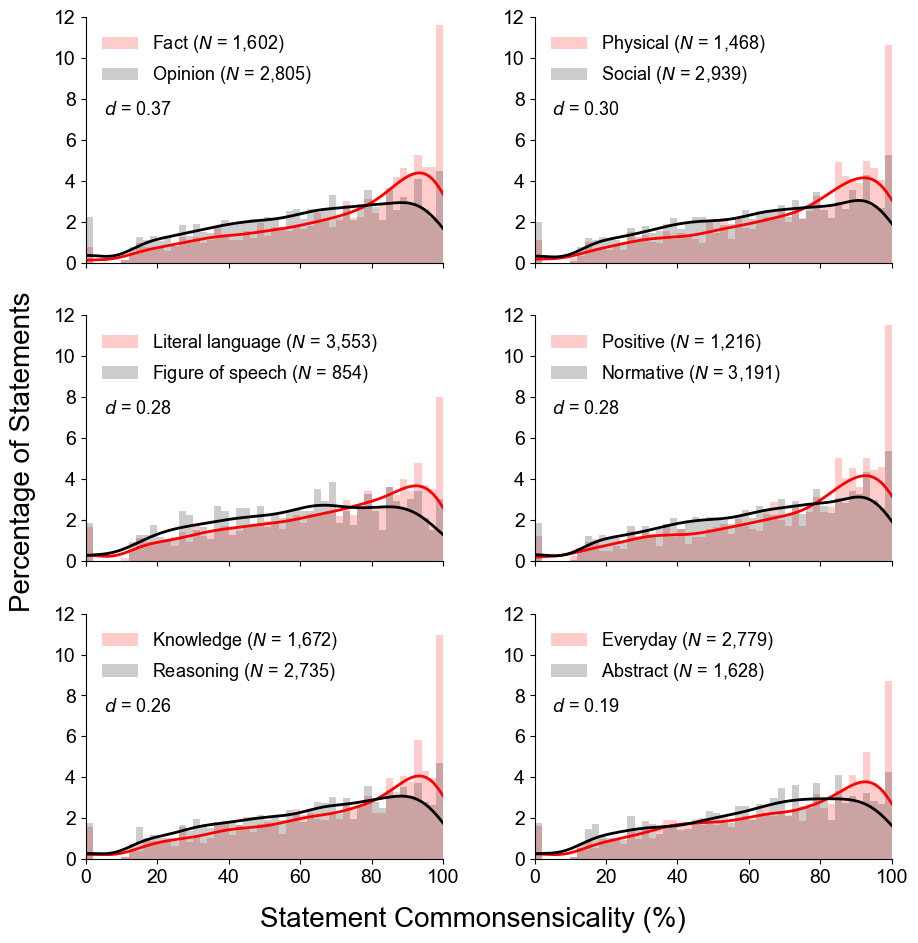

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(9, 9), sharex=True)

axes = axes.flatten()

feature_pair_order = [
    ("fact", "opinion"),
    ("physical", "social"),
    ("literal language", "Figure of speech"),
    ("positive", "normative"),
    ("knowledge", "reasoning"),
    ("everyday", "abstract"),
]

for i, (feature1, feature2) in enumerate(feature_pair_order):
    ax = axes[i]
    m1, c1, a1 = get_statement_scores_by_feature(feature1)
    m2, c2, a2 = get_statement_scores_by_feature(feature2)

    sns.histplot(
        m1,
        bins=np.arange(0, 101, 2),
        ax=ax,
        kde=True,
        stat="percent",
        color="red",
        alpha=0.2,
        line_kws=dict(lw=2),
        element="step",
        edgecolor=None,
        label=f"{feature1.capitalize()} ($N$ = {len(m1):,})",
    )
    sns.histplot(
        m2,
        bins=np.arange(0, 101, 2),
        ax=ax,
        kde=True,
        stat="percent",
        color="black",
        alpha=0.2,
        line_kws=dict(lw=2),
        element="step",
        edgecolor=None,
        label=f"{feature2.capitalize()} ($N$ = {len(m2):,})",
    )
    ax.legend(frameon=False, fontsize=13, loc="upper left")

    diff = m1.mean() - m2.mean()
    sd1 = m1.std(ddof=1)
    sd2 = m2.std(ddof=1)
    pooled_sd = np.sqrt(
        ((len(m1) - 1) * sd1**2 + (len(m2) - 1) * sd2**2) / (len(m1) + len(m2) - 2)
    )

    cohen_d = diff / pooled_sd

    ax.set_ylabel(None)
    ax.tick_params(axis="both", which="major", labelsize=14)
    sns.despine(ax=ax)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 12)

    ax.text(x=5, y=ax.get_ylim()[1] * 0.6, s=f"$d$ = {cohen_d:.2f}", fontsize=13)

fig.text(
    x=0.5,
    y=-0.02,
    s="Statement Commonsensicality (%)",
    ha="center",
    va="center",
    fontsize=20,
)
fig.text(
    x=0,
    y=0.5,
    s="Percentage of Statements",
    ha="center",
    va="center",
    rotation=90,
    fontsize=20,
)

plt.tight_layout(h_pad=3, w_pad=2)
plt.savefig("figures/statement_comm_comparison_by_feature.pdf", bbox_inches="tight")